<a href="https://colab.research.google.com/github/okana2ki/intro-to-DS/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下は、Gemini 3に「経営学部の大学1年生が、AIやデータサイエンスに興味を持つきっかけを提供したい。Google Colab上で実行できるプログラムで、その目的に適したものとしてどのような候補があるか、案を５つ挙げて。学生が実行ボタンをクリックするだけで実行できるものにしたい。APIキーの準備など、実行ボタンを押す以外の準備や操作は不要なものにしたい。コードの生成は案を見て選択した後でいいです。」と依頼して作成してもらった案のうちの最初のもの（一押しのもの）です。

[上記のGeminiとの対話へのリンク](https://gemini.google.com/share/f02687ed60a0)←予測モデルの技術的解説（経営学部生向けの易しい解説です）などを含む

# 「推し企業」の株価推移と未来予測

**内容:** yfinanceというライブラリを使い、トヨタやAppleなどの実データをリアルタイムで取得。過去の推移をグラフ化し、AI（Prophetというライブラリ）を使って「明日以降の価格」を予測させます。

**ビジネス的視点:** 「勘と経験」ではなく、過去のトレンドから未来を予測するデータドリブンな意思決定を体験できます。

↓このプログラムでは、米国のテック大手 Apple (AAPL) の過去数年分の株価をAI（Meta社が開発した予測モデル「Prophet」）に学習させ、1年後の推移を予測します。

--- AAPL のデータを取得中... ---


/tmp/ipython-input-1119066122.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01")
[*********************100%***********************]  1 of 1 completed


--- AIが株価のパターンを学習中... ---
--- 予測完了！グラフを表示します ---


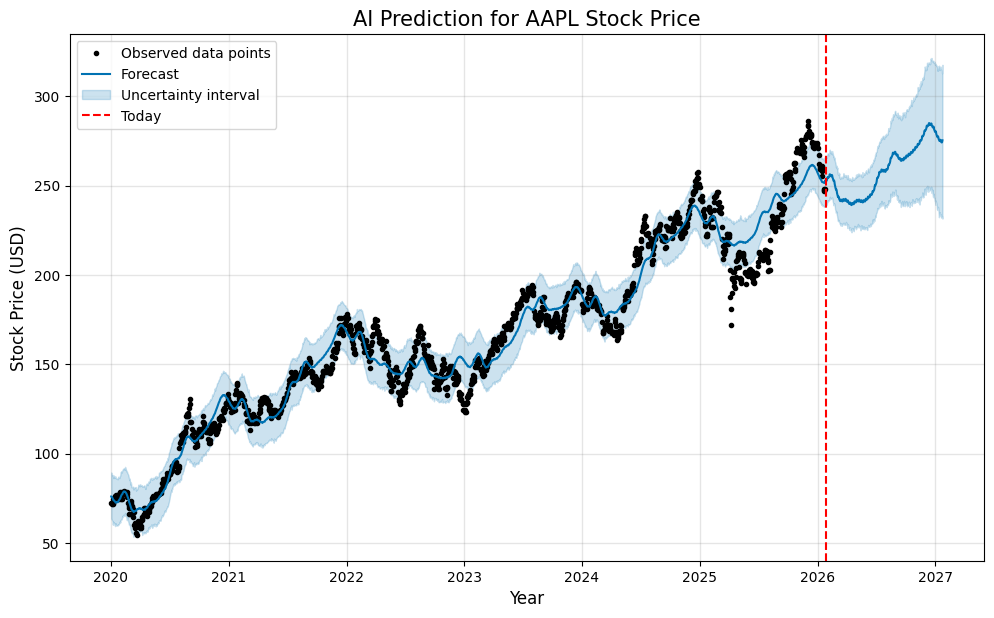


【グラフの見方】
・黒い点： 実際の株価データ
・青い線： AIが導き出した予測トレンド
・薄青の範囲： 予測の『不確実性（リスク）』。幅が広いほど予測が難しいことを示します。


In [ ]:
# 1. 必要なライブラリをインストール（Colab環境を最新に）
!pip install yfinance prophet -q

import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

# 2. データの取得（Appleの株価を2020年から現在まで取得）
ticker = "AAPL"
print(f"--- {ticker} のデータを取得中... ---")
data = yf.download(ticker, start="2020-01-01")

# 3. AIが読み込める形式にデータを整える
df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']  # Prophetのルール: 日付は'ds'、値は'y'にする
df['ds'] = df['ds'].dt.tz_localize(None)

# 4. AIモデルの作成と学習（「季節性」を考慮するように設定）
print("--- AIが株価のパターンを学習中... ---")
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)

# 5. 未来の予測（365日分）
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 6. 結果の可視化
print("--- 予測完了！グラフを表示します ---")
fig = model.plot(forecast)
plt.title(f"AI Prediction for {ticker} Stock Price", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.axvline(datetime.now(), color='red', linestyle='--', label='Today') # 今日を表す線
plt.legend()
plt.show()

# 💡 ミニ解説
print("\n【グラフの見方】")
print("・黒い点： 実際の株価データ")
print("・青い線： AIが導き出した予測トレンド")
print("・薄青の範囲： 予測の『不確実性（リスク）』。幅が広いほど予測が難しいことを示します。")

このプログラムを実行した後、学生に以下のような問いかけをすると、経営学とデータサイエンスの結びつきが深まります。

1. 「予測の幅（薄青いエリア）」に注目しよう

- 未来に行けば行くほど、青いエリアが広がっていますよね？これは「不確実性」を意味します。経営において「リスクを数値化する」とはどういうことか、視覚的に理解できます。

2. AIは何を見ているのか？

- このAIは過去の「周期性（月曜日は高い、12月は上がるなど）」を自動で見つけています。企業の決算期や季節需要が株価にどう影響するか、データから裏付けることができます。

3. 「外れる」ことも学び

- AIは過去のパターンに基づきます。パンデミックや戦争などの「予測不能な事態」が起きたとき、経営者はデータとどう向き合うべきか？という議論に繋げられます。

## 演習：自分が好きな企業に書き換えよう

次は、Apple（AAPL）ではなく、自分の好きな企業（トヨタなら 7203.T、任天堂なら 7974.T など）のコードに書き換えて実行してみましょう。

自分で書き換えてもいいし、Geminiに変更を頼んでもいいですよ。